In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
raw_data = sns.load_dataset('titanic')
print(raw_data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
print(raw_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
clean_data = raw_data.dropna(axis = 1, thresh = 500)
print(clean_data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  


In [7]:
mean_age = clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [8]:
clean_data['age'].fillna(mean_age, inplace = True)
print(clean_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
clean_data.drop(['embark_town', 'alive'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
print(clean_data)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male  alone  
0     Third    man        True  False  
1     F

In [11]:
clean_data['embarked'].fillna(method = 'ffill', inplace = True)
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
label = list(clean_data.columns)
keep = label.pop(0)
target =  clean_data[[keep]]
training_data = clean_data[label]
print(training_data.head())
print(target.head())

   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male  alone  
0        True  False  
1       False  False  
2       False   True  
3       False  False  
4        True   True  
   survived
0         0
1         1
2         1
3         1
4         0


In [16]:
value_data = training_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data) # 표준화 평균 0 표준편차 1
value_data = pd.DataFrame(scaled_data, columns = value_data.columns)
print(value_data.describe())

                age          fare
count  8.910000e+02  8.910000e+02
mean   1.379991e-17 -4.373606e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%   -2.232906e-16 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00



onehot_data = pd.get_dummies(training_data, columns = training_data.columns)
print(onehot_data)

In [21]:
onehot_data= pd.get_dummies(training_data, columns= training_data.columns)   #디폴트로는 int타입은 안해주니까 columns에 전체 컬럼 넣는다고 대입함.
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_female  sex_male  sibsp_0  sibsp_1  \
0         0         0         1           0         1        0        1   
1         1         0         0           1         0        0        1   
2         0         0         1           1         0        1        0   
3         1         0         0           1         0        0        1   
4         0         0         1           0         1        1        0   

   sibsp_2  sibsp_3  sibsp_4  ...  class_First  class_Second  class_Third  \
0        0        0        0  ...            0             0            1   
1        0        0        0  ...            1             0            0   
2        0        0        0  ...            0             0            1   
3        0        0        0  ...            1             0            0   
4        0        0        0  ...            0             0            1   

   who_child  who_man  who_woman  adult_male_False  adult_male_True  \
0          0   

In [23]:
traning_data = pd.concat((onehot_data, value_data), axis = 1)
print(traning_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass_1          891 non-null    uint8  
 1   pclass_2          891 non-null    uint8  
 2   pclass_3          891 non-null    uint8  
 3   sex_female        891 non-null    uint8  
 4   sex_male          891 non-null    uint8  
 5   sibsp_0           891 non-null    uint8  
 6   sibsp_1           891 non-null    uint8  
 7   sibsp_2           891 non-null    uint8  
 8   sibsp_3           891 non-null    uint8  
 9   sibsp_4           891 non-null    uint8  
 10  sibsp_5           891 non-null    uint8  
 11  sibsp_8           891 non-null    uint8  
 12  parch_0           891 non-null    uint8  
 13  parch_1           891 non-null    uint8  
 14  parch_2           891 non-null    uint8  
 15  parch_3           891 non-null    uint8  
 16  parch_4           891 non-null    uint8  
 1

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    traning_data, target, test_size = 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 34) (712, 1)
(179, 34) (179, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(128, input_dim = 34, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               4480      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [30]:
model.compile(loss='mse', optimizer = 'adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=30,
    validation_split=0.2, verbose=1
)

Epoch 1/30
12/12 [==============================] - 3s 57ms/step - loss: 0.2040 - binary_accuracy: 0.6749 - val_loss: 0.1872 - val_binary_accuracy: 0.7343
Epoch 2/30
12/12 [==============================] - 0s 21ms/step - loss: 0.1512 - binary_accuracy: 0.7926 - val_loss: 0.1649 - val_binary_accuracy: 0.7832
Epoch 3/30
12/12 [==============================] - 0s 20ms/step - loss: 0.1325 - binary_accuracy: 0.8207 - val_loss: 0.1645 - val_binary_accuracy: 0.7552
Epoch 4/30
12/12 [==============================] - 0s 19ms/step - loss: 0.1336 - binary_accuracy: 0.8172 - val_loss: 0.1584 - val_binary_accuracy: 0.7902
Epoch 5/30
12/12 [==============================] - 0s 19ms/step - loss: 0.1241 - binary_accuracy: 0.8436 - val_loss: 0.1594 - val_binary_accuracy: 0.7832
Epoch 6/30
12/12 [==============================] - 0s 22ms/step - loss: 0.1244 - binary_accuracy: 0.8278 - val_loss: 0.1641 - val_binary_accuracy: 0.7622
Epoch 7/30
12/12 [==============================] - 0s 23ms/step - los

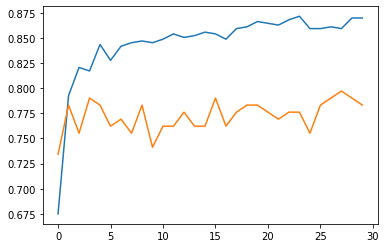

In [31]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss :', score[0])
print('accuracy :', score[1])

loss : 0.10743052512407303
accuracy : 0.8435754179954529
